In [3]:
%load_ext autoreload
%autoreload

#%autoreload
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>div.output_area{max-height:10000px;overflow:scroll;}</style>"""))

import pandas as pd
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",500)
pd.set_option('precision', 3)

from os.path import join
from os import listdir
from pandas import read_csv, read_excel, Series, DataFrame, to_numeric, concat
from sklearn.externals import joblib

import geopandas as gpd

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


from pmdarima.arima import auto_arima

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
df = read_excel("/Users/tgadfort/Downloads/Sample - Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']

In [9]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [10]:
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [15]:
furniture_day = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [19]:
sales = furniture_day["Sales"]
sales.index = furniture_day["Order Date"]

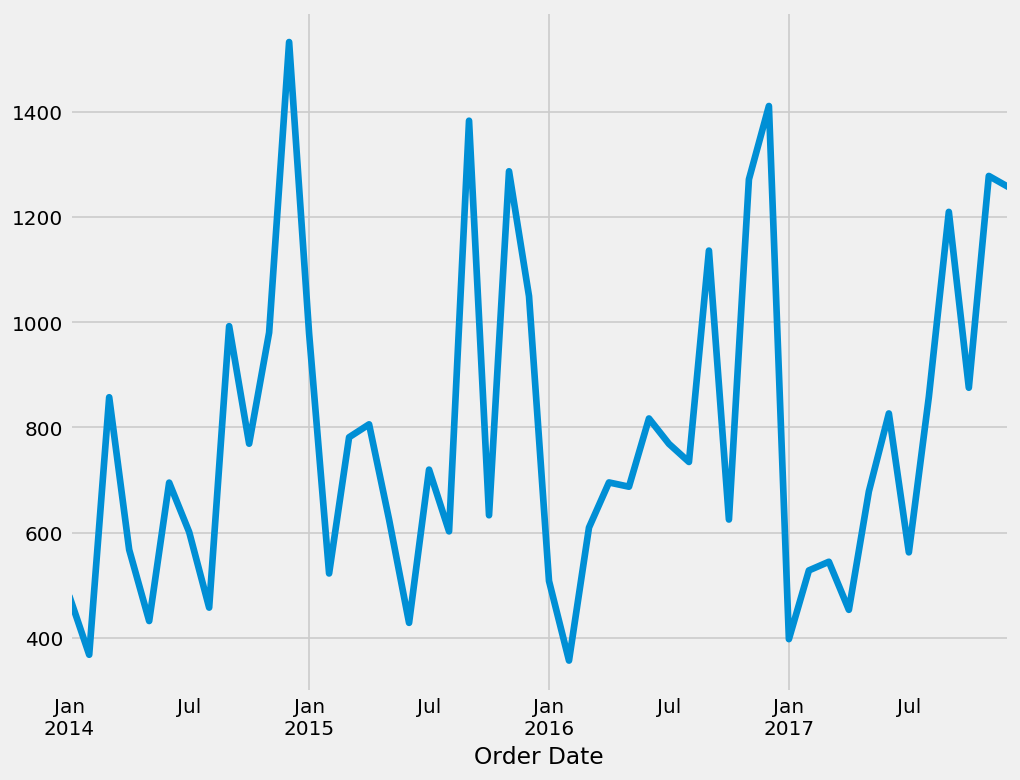

In [27]:
monthly_sales = sales.resample("MS").mean()
monthly_sales.plot()

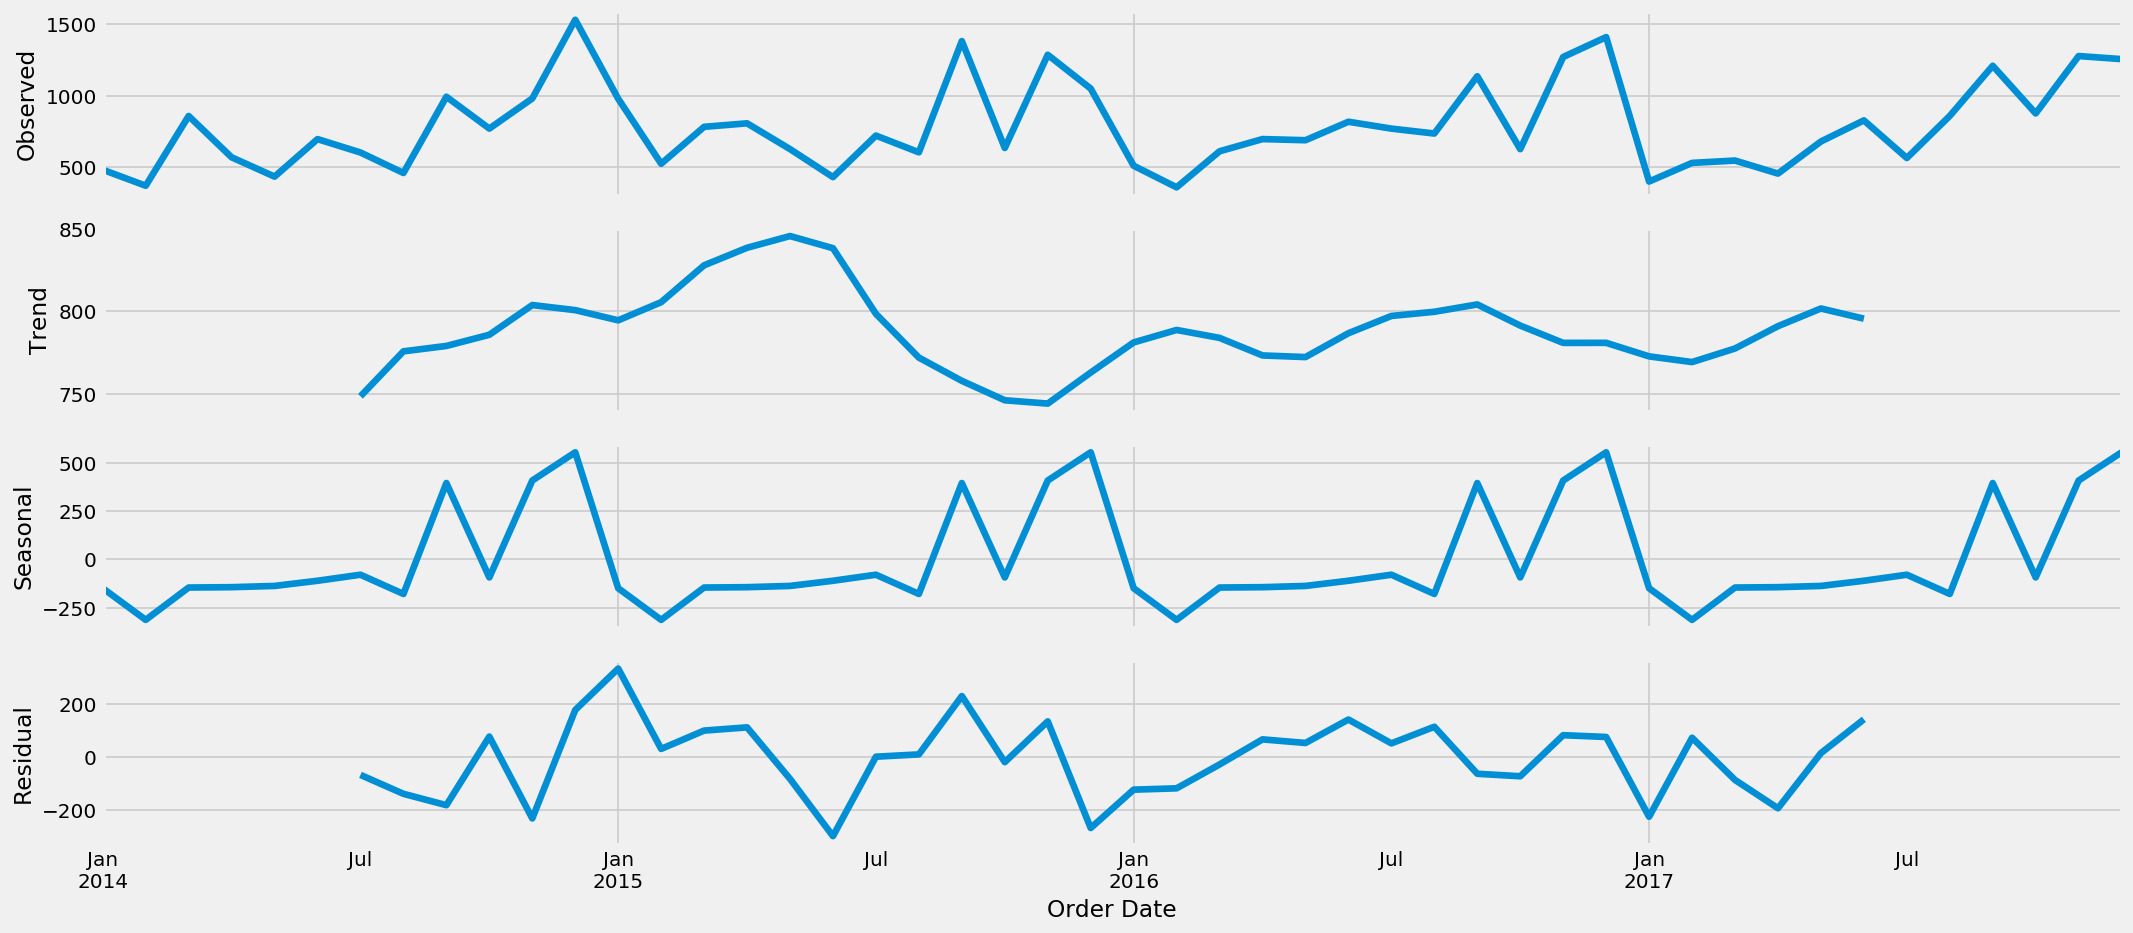

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive')
fig = decomposition.plot()
plt.show()

In [29]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [39]:
import statsmodels.api as sm
#from statsmodels.tsa.statespace import SARIMAX

In [43]:
import statsmodels.api as sm

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_sales,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1446.5593245884702
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920218
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1172.2086741447833
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758095
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2900.357535652858
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809126
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.580913309711
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2513.1394870316744
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.988487694687
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1250.256448915547
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1550.2028404680511
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(

In [44]:
mod = sm.tsa.statespace.SARIMAX(monthly_sales,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


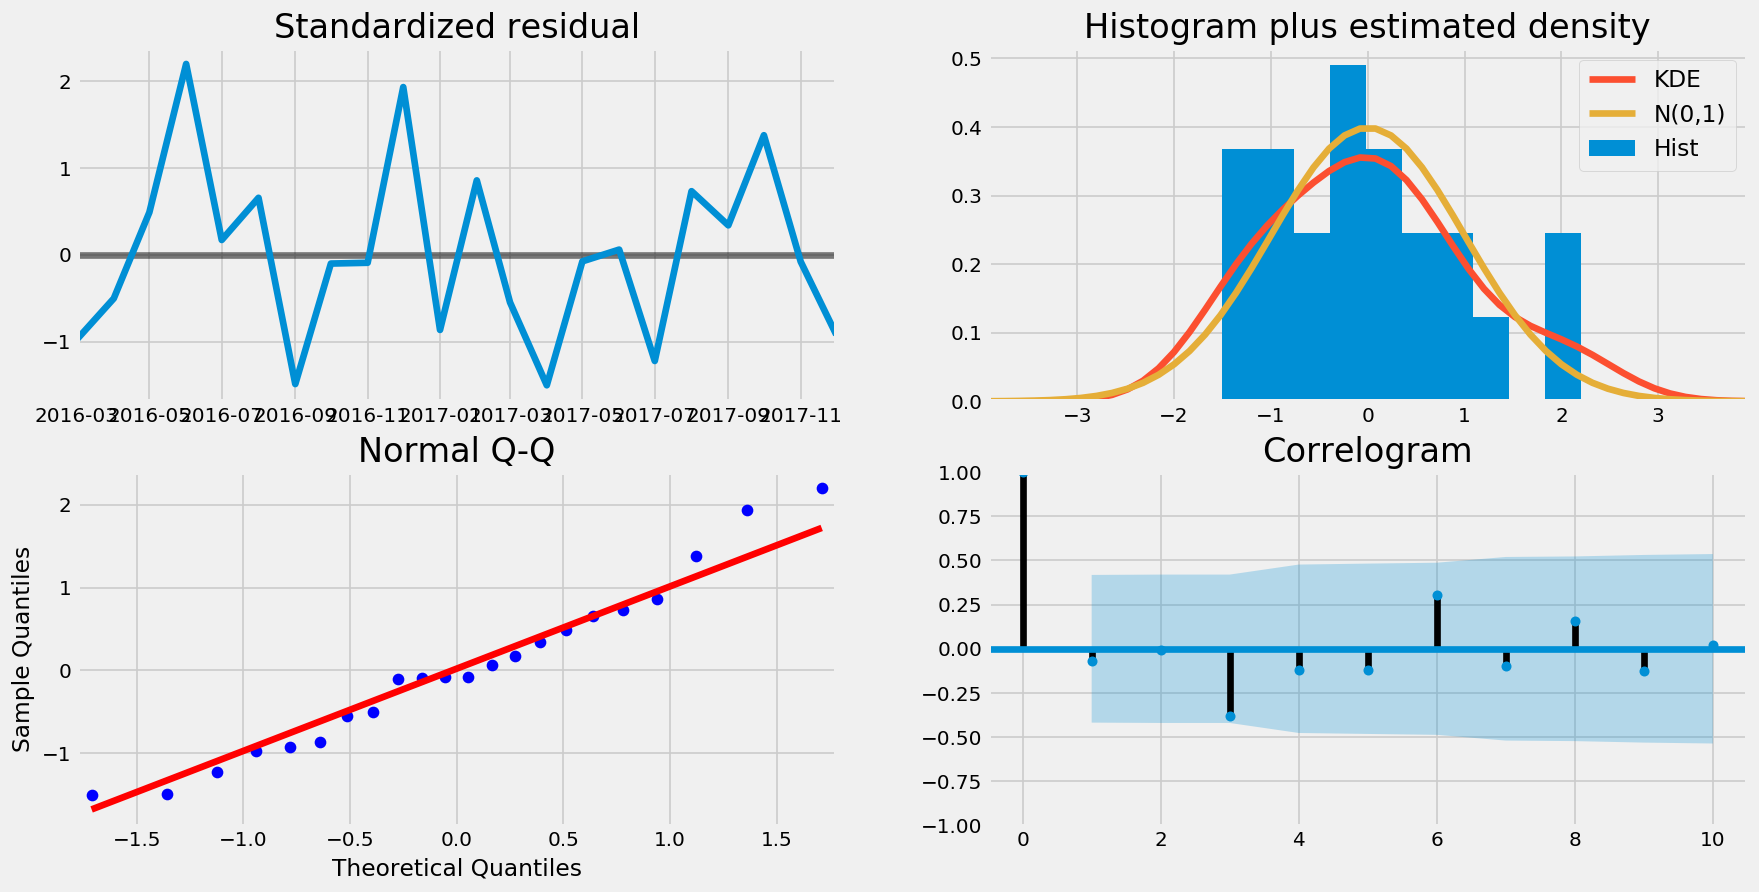

In [45]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

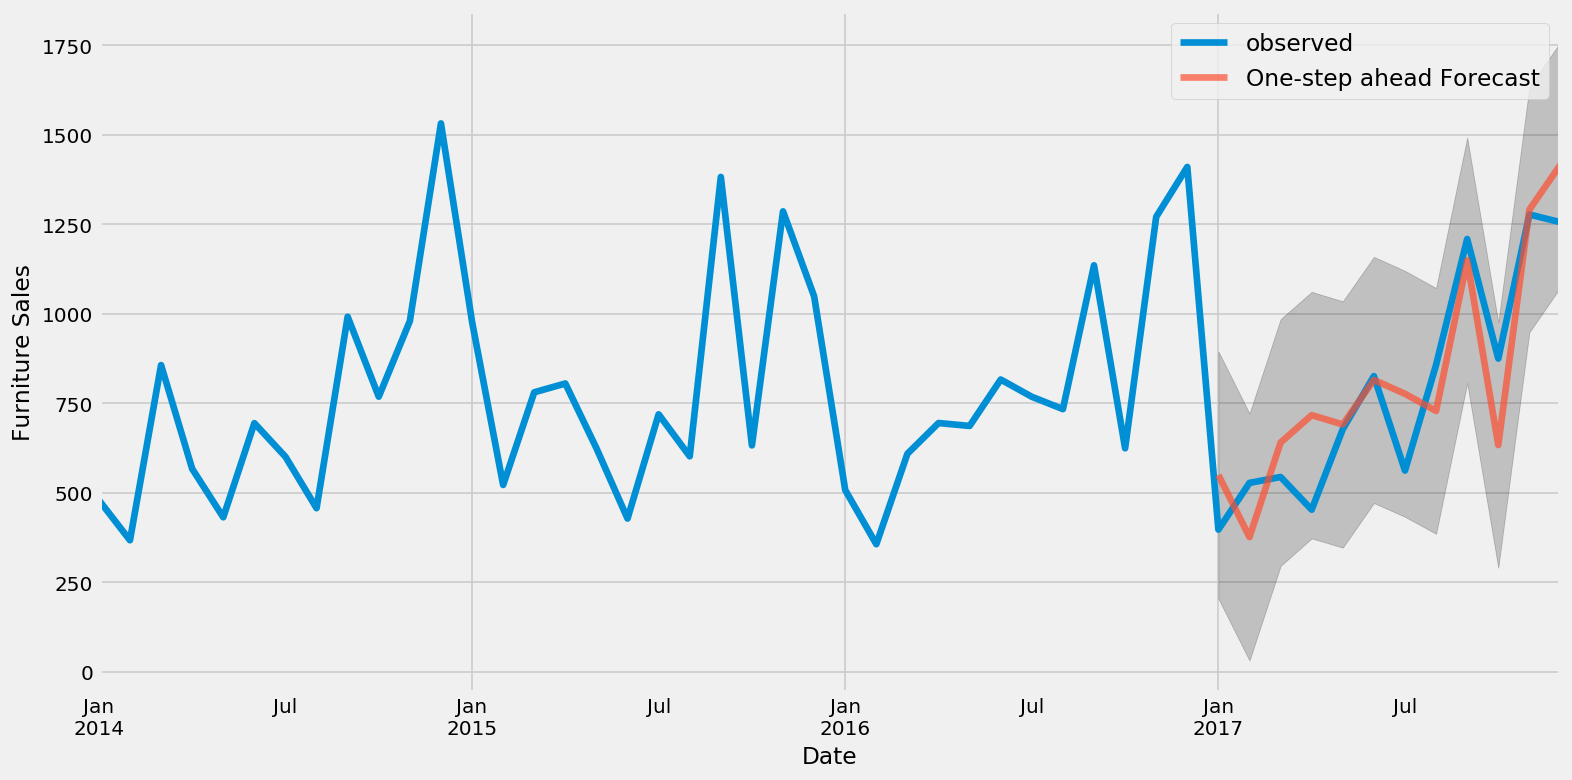

In [46]:
y = monthly_sales
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

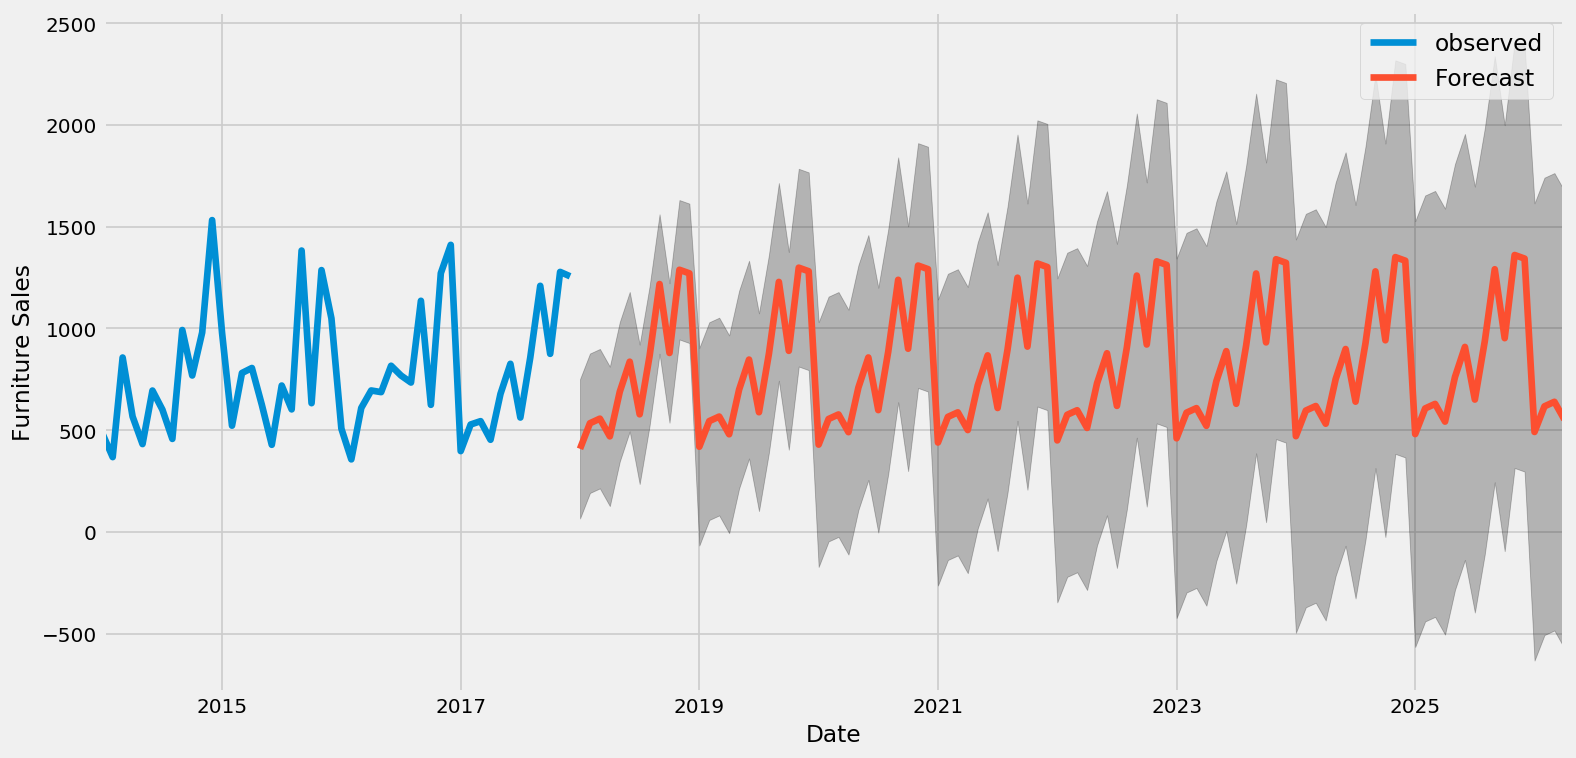

In [47]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [48]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [ ]:

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf
train = df.value[:85]
test = df.value[85:]
forecast_accuracy(fc, test.values)

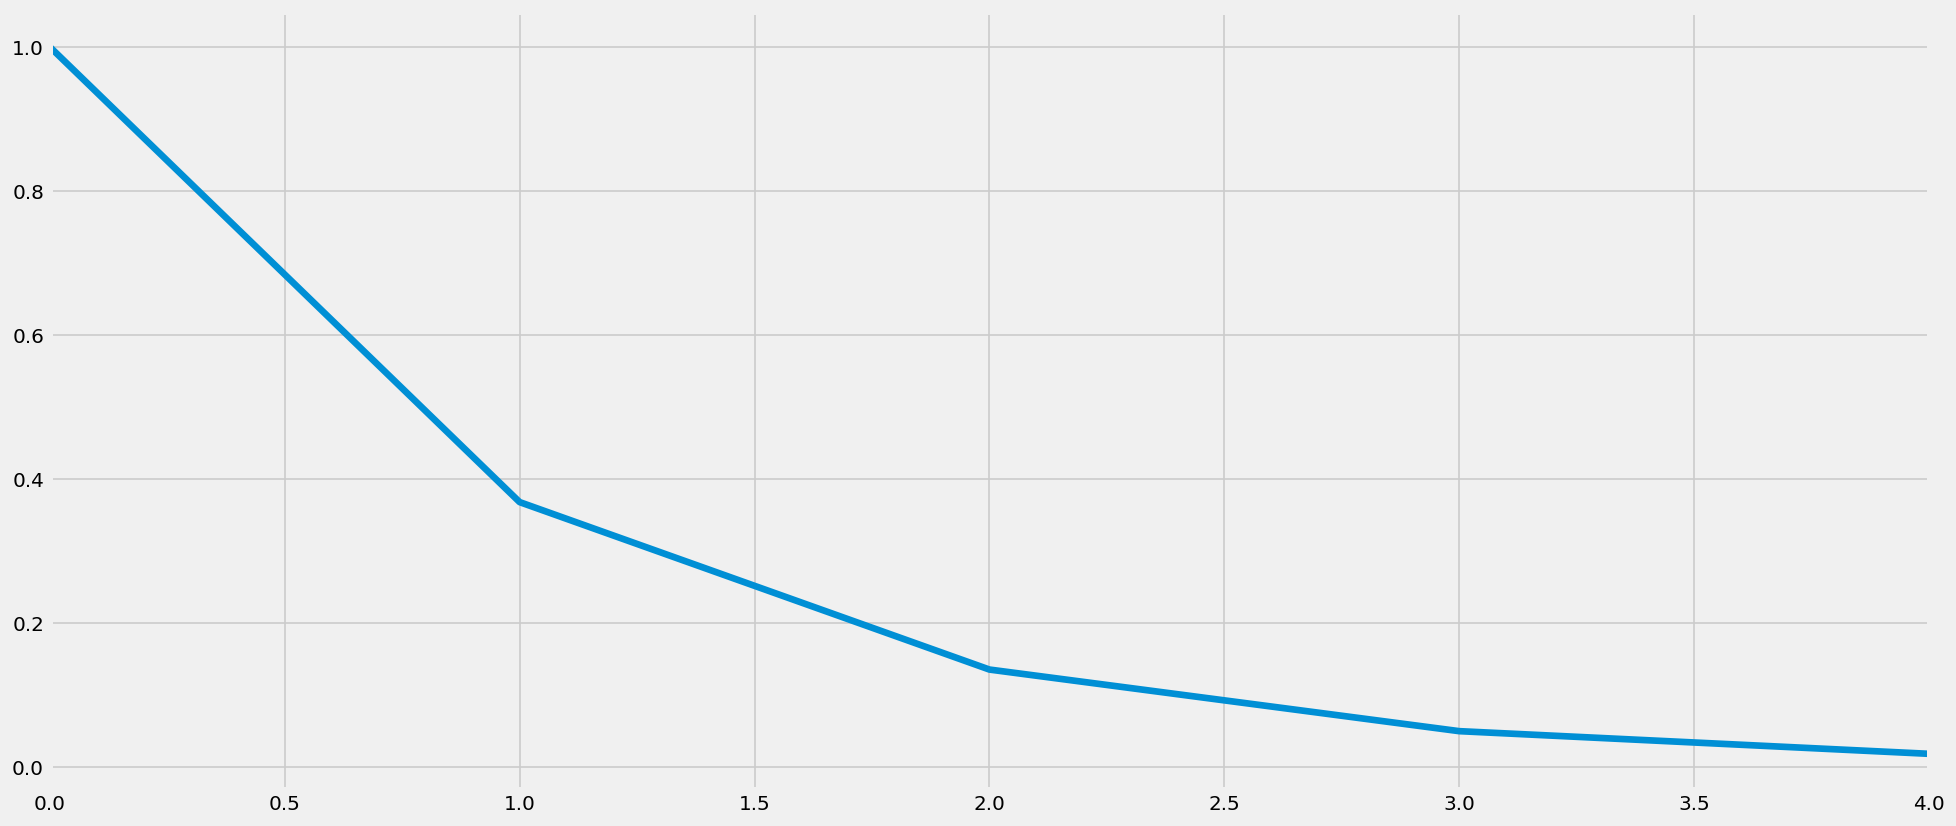

In [66]:
data.plot()

In [80]:
def getSARIMAX(df, steps, order, seasonal_order):
    from statsmodels.tsa.statespace.sarimax import SARIMAX

    # 1,1,2 ARIMA Model
    model = SARIMAX(df.value, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    fit_res = model.fit(disp=False)
    res = model.filter(fit_res.params)

    # Perform prediction and forecasting
    predict = res.get_prediction()
    forecast = res.get_forecast(steps)

    # Get central and CI values
    forecasts = {}
    for cl in [0.5, 0.9, 0.68, 0.95]:
        forecast_mean = forecast.predicted_mean
        forecast_cint = forecast.conf_int(alpha=1-cl)
        forecasts[cl] = [forecast_mean, forecast_cint]

    cl=0.9
    predict_mean = predict.predicted_mean
    predict_mean = predict_mean[2:]
    predict_cint = predict.conf_int(alpha=1-cl)
    predict_cint = predict_cint[2:]
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    from numpy import sqrt
    ytrue = df.value[2:]
    ypred = predict_mean
    mae  = mean_absolute_error(ytrue, ypred)
    rmse = sqrt(mean_squared_error(ytrue, ypred))
    

    return [predict_mean, predict_cint, forecasts, mae, rmse]

def getBestFit(df, d=1, m=12):
    from pmdarima.arima import auto_arima
    stepwise_fit = auto_arima(df, start_p=1, start_q=1, max_p=3, max_q=3, m=m,
                              start_P=0, seasonal=False, d=d, D=1, trace=True,
                              error_action='ignore',  # don't want to know if an order does not work
                              suppress_warnings=True,  # don't want convergence warnings
                              stepwise=True)  # set to stepwise

    return stepwise_fit

In [113]:
from random import random
random()

0.6176764199844357

In [207]:
import numpy as np
pure = np.arange(0,-7, -0.025)
noise = np.random.normal(0, 0.02, pure.shape)
signal = exp(pure) + noise

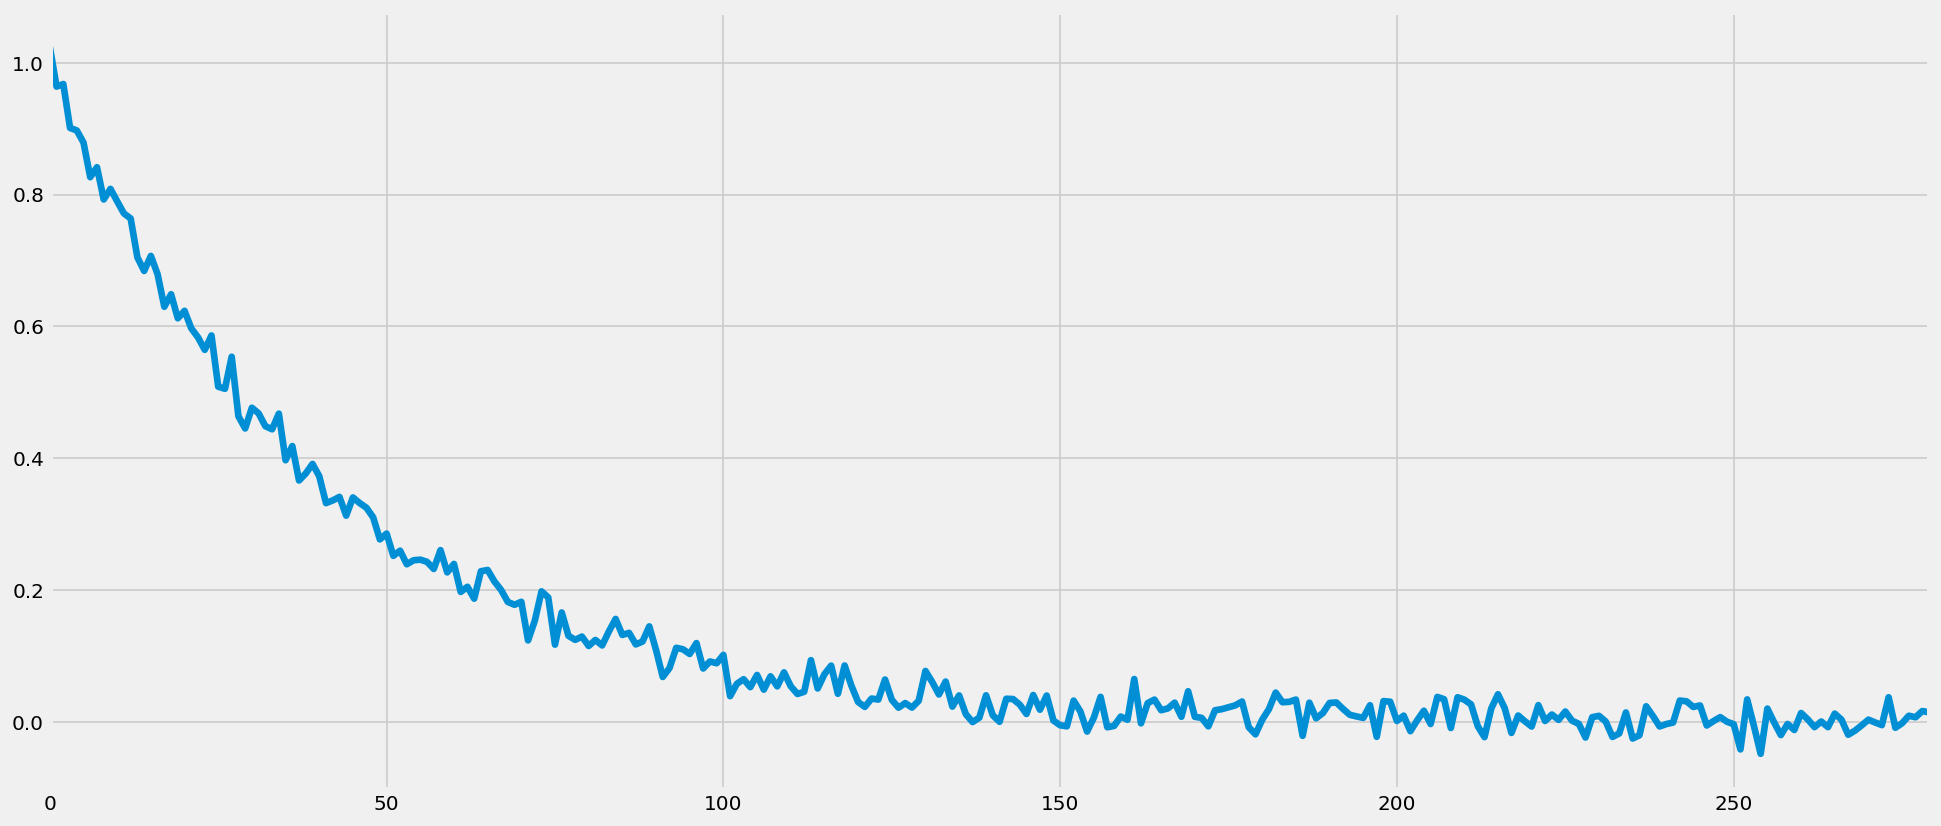

In [208]:
data = signal
Series(data).plot()

In [195]:
bestD0 = getBestFit(data, d=0)
bestD1 = getBestFit(data, d=1)
bestD2 = getBestFit(data, d=2)

Fit ARIMA: order=(1, 0, 1); AIC=-228.567, BIC=-216.267, Fit time=0.229 seconds
Fit ARIMA: order=(0, 0, 0); AIC=501.976, BIC=508.126, Fit time=0.002 seconds
Fit ARIMA: order=(1, 0, 0); AIC=-195.416, BIC=-186.190, Fit time=0.031 seconds
Fit ARIMA: order=(0, 0, 1); AIC=314.399, BIC=323.625, Fit time=0.021 seconds
Fit ARIMA: order=(2, 0, 1); AIC=nan, BIC=nan, Fit time=0.130 seconds
Fit ARIMA: order=(1, 0, 2); AIC=-219.338, BIC=-203.962, Fit time=0.137 seconds
Fit ARIMA: order=(2, 0, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.685 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-301.152, BIC=-288.877, Fit time=0.096 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-207.245, BIC=-201.107, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-245.565, BIC=-236.358, Fit time=0.019 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-302.812, BIC=-293.605, Fit time=0.072 seconds
Fit ARIMA: order=(0, 1, 2); AIC=-301.154, BIC=-288.879, Fit time=0.134 seconds
Fit ARIMA: order=(1, 1, 2); AIC=-299.603, BIC=-2

In [161]:
bestD1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  159
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 325.775
Method:                       css-mle   S.D. of innovations              0.031
Date:                Fri, 10 May 2019   AIC                           -643.550
Time:                        15:48:37   BIC                           -631.274
Sample:                             1   HQIC                          -638.565
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0058      0.001     -4.870      0.000      -0.008      -0.003
ar.L1.D.y     -0.6808      0.075     -9.027      0.000      -0.829      -0.533
ar.L2.D.y     -0.4136      0.077     -5.384      0.000      -0.564      -0.263
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8229           -1.3192j            1.5548           -0.3388
AR.2           -0.8229           +1.3192j            1.5548            0.3388
-----------------------------------------------------------------------------
"""

In [209]:
import statsmodels.api as sm

p = d = q = range(0, 4)
best = [0, None]
pdq = list(itertools.product(p, d, q))

for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(data,
                                        order=param,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
        if results.aic < best[0]:
            best = [results.aic, param]
    except:
        continue
        
print("Best Param: {0}".format(best))

data = Series(data)
mod = sm.tsa.statespace.SARIMAX(Series(data),
                                order=best[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

ARIMA(0, 0, 0) - AIC:50.88621855534855
ARIMA(0, 0, 1) - AIC:-290.409449955299
ARIMA(0, 0, 2) - AIC:-528.1356584221796
ARIMA(0, 0, 3) - AIC:-673.2218067278966
ARIMA(0, 1, 0) - AIC:-1214.5687514780393
ARIMA(0, 1, 1) - AIC:-1252.871056634136
ARIMA(0, 1, 2) - AIC:-1255.6824504317606
ARIMA(0, 1, 3) - AIC:-1262.413480167617
ARIMA(0, 2, 0) - AIC:-931.5035401760254
ARIMA(0, 2, 1) - AIC:-1206.1054486096232
ARIMA(0, 2, 2) - AIC:-1315.31820773154
ARIMA(0, 2, 3) - AIC:-1316.363787068562
ARIMA(0, 3, 0) - AIC:-605.3408526583943
ARIMA(0, 3, 1) - AIC:-920.1545356831473
ARIMA(0, 3, 2) - AIC:-1195.0526841309188
ARIMA(0, 3, 3) - AIC:-1318.0311543970813
ARIMA(1, 0, 0) - AIC:-1240.088876914254
ARIMA(1, 0, 1) - AIC:-1399.5588703213252
ARIMA(1, 0, 2) - AIC:-1390.8891328155246
ARIMA(1, 0, 3) - AIC:-1385.3937400314069
ARIMA(1, 1, 0) - AIC:-1251.2830775234006
ARIMA(1, 1, 1) - AIC:-1251.7064616756202
ARIMA(1, 1, 2) - AIC:-1375.918315398346
ARIMA(1, 1, 3) - AIC:-1369.118050941273
ARIMA(1, 2, 0) - AIC:-1061.094386

In [183]:
data

0      0.878
1      0.935
2      1.034
3      0.863
4      0.938
5      0.833
6      0.733
7      0.856
8      0.758
9      0.800
10     0.788
11     0.779
12     0.776
13     0.761
14     0.644
15     0.698
16     0.684
17     0.669
18     0.652
19     0.733
20     0.575
21     0.548
22     0.684
23     0.582
24     0.544
25     0.541
26     0.520
27     0.595
28     0.513
29     0.537
30     0.503
31     0.500
32     0.455
33     0.492
34     0.401
35     0.417
36     0.425
37     0.392
38     0.391
39     0.408
40     0.404
41     0.323
42     0.314
43     0.336
44     0.269
45     0.256
46     0.301
47     0.305
48     0.272
49     0.256
50     0.250
51     0.281
52     0.276
53     0.282
54     0.252
55     0.299
56     0.256
57     0.241
58     0.245
59     0.221
60     0.235
61     0.222
62     0.236
63     0.191
64     0.186
65     0.194
66     0.191
67     0.185
68     0.202
69     0.187
70     0.174
71     0.176
72     0.150
73     0.146
74     0.167
75     0.160
76     0.140

In [218]:
dataP = data[5:]
pred = results.get_prediction(start=5, dynamic=False)
pred_ci = pred.conf_int()

forecast = results.get_forecast(100)
forecast_ci = forecast.conf_int()

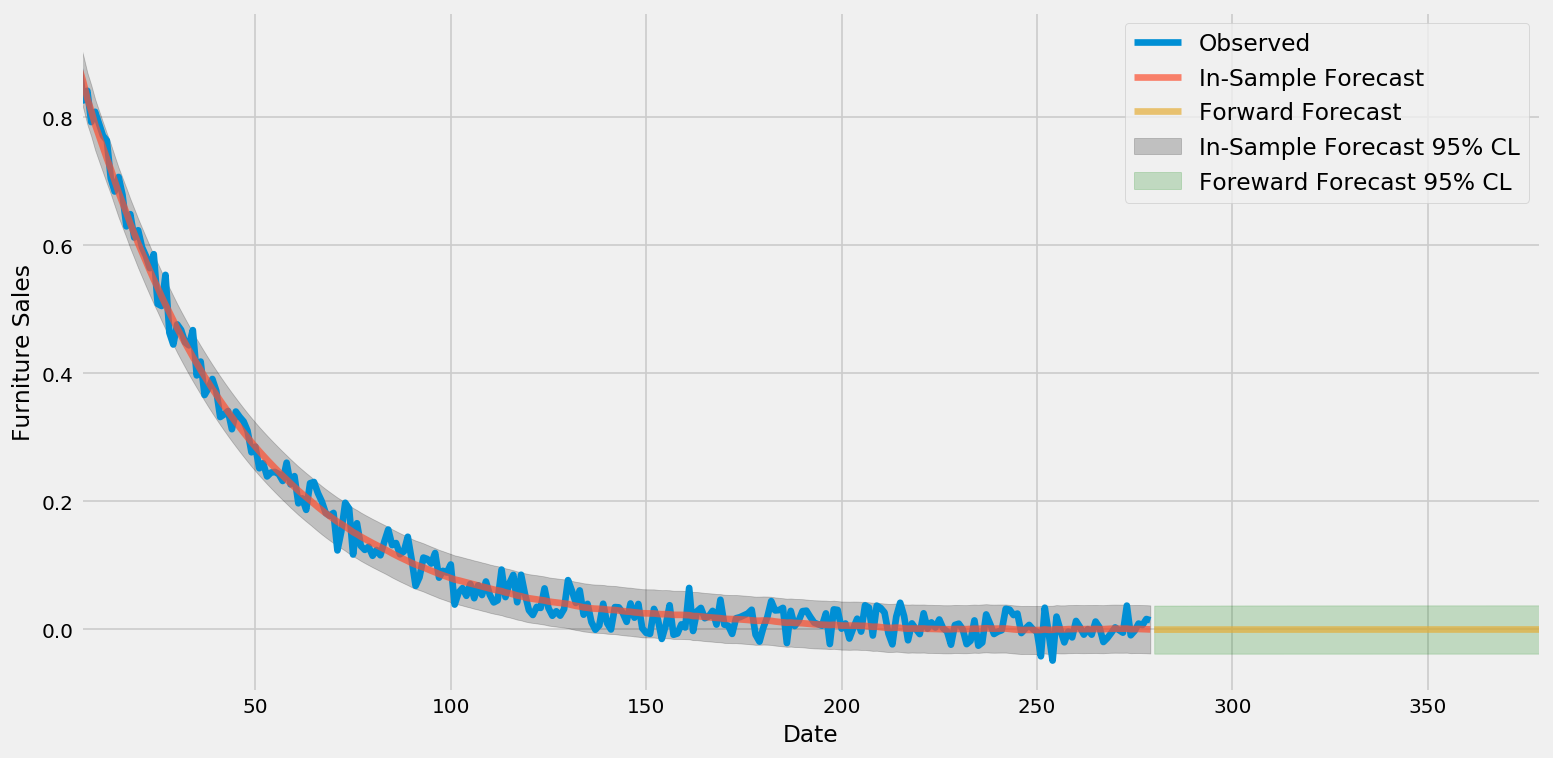

In [221]:

ax = dataP.plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='In-Sample Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2, label='In-Sample Forecast 95% CL')
forecast.predicted_mean.plot(ax=ax, label='Forward Forecast', alpha=.7)
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.2, label='Foreward Forecast 95% CL')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

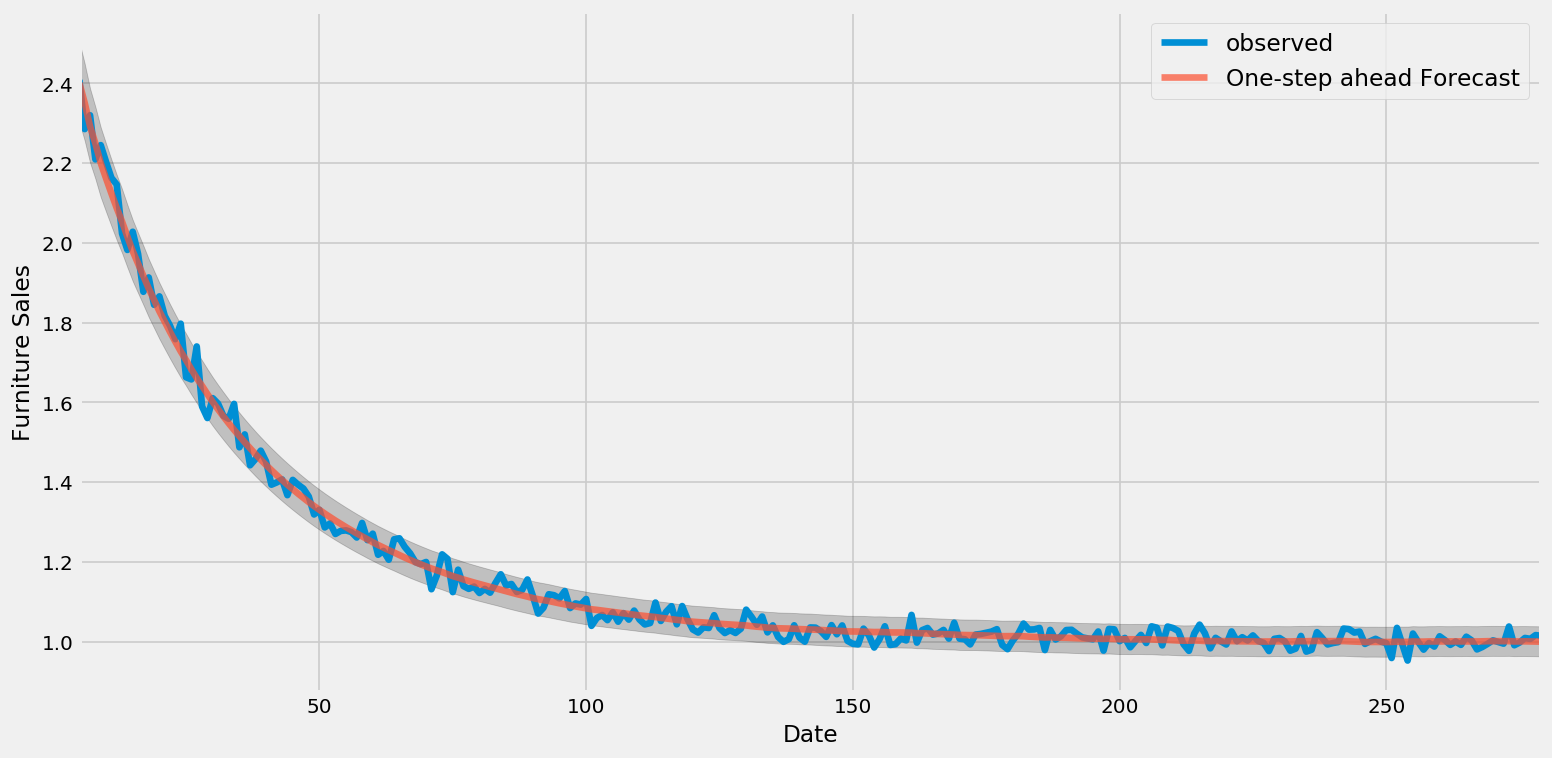

In [222]:
dataP = exp(data[5:])
pred = results.get_prediction(start=5, dynamic=False)
pred_ci = pred.conf_int()

ax = dataP.plot(label='observed')
exp(pred.predicted_mean).plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                exp(pred_ci.iloc[:, 0]),
                exp(pred_ci.iloc[:, 1]), color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [85]:
from bokeh.plotting import figure, show, output_notebook
import pandas as pd

# init bokeh
output_notebook()

def plot_arima(truth, forecasts, title="ARIMA", xaxis_label='Time',
               yaxis_label='Value', c1='#A6CEE3', c2='#B2DF8A', 
               forecast_start=None, **kwargs):
    
    # make truth and forecasts into pandas series
    n_truth = truth.shape[0]
    n_forecasts = forecasts.shape[0]
    
    # always plot truth the same
    truth = pd.Series(truth, index=np.arange(truth.shape[0]))
    
    # if no defined forecast start, start at the end
    if forecast_start is None:
        idx = np.arange(n_truth, n_truth + n_forecasts)
    else:
        idx = np.arange(forecast_start, n_forecasts)
    forecasts = pd.Series(forecasts, index=idx)
    
    # set up the plot
    p = figure(title=title, plot_height=400, **kwargs)
    p.grid.grid_line_alpha=0.3
    p.xaxis.axis_label = xaxis_label
    p.yaxis.axis_label = yaxis_label
    
    # add the lines
    p.line(truth.index, truth.values, color=c1, legend='Observed')
    p.line(forecasts.index, forecasts.values, color=c2, legend='Forecasted')
    
    return p

Loading BokehJS ...

In [166]:
type(bestD0)
#bestD1.predict()
#in_sample_preds = bestD2.predict_in_sample()
#next_25 = bestD0.predict(n_periods=25)

pmdarima.arima.arima.ARIMA

In [160]:
show(plot_arima(data, in_sample_preds, 
                title="Original Series & In-sample Predictions", 
                c2='#FF0000', forecast_start=0))

In [108]:
show(plot_arima(data, next_25))

In [110]:
updated_data = np.concatenate([data, next_25])
updated_model = bestD0.fit(updated_data)
updated_model.summary()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.